In [1]:
#%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [11]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
Base = automap_base()

In [12]:
# reflect an existing database into a new model
Base.prepare(engine,reflect = True)

# reflect the tables


In [13]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [19]:
# Save references to each table
mts = Base.classes.measurement
sts = Base.classes.station

In [20]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [21]:
# Find the most recent date in the data set.
latest_date = session.query(mts.date).order_by(mts.date.desc()).first()
latest_date

('2017-08-23',)

Text(0.5, 1.0, 'Precipitation for 8-23-2016 to 8-23-2017')

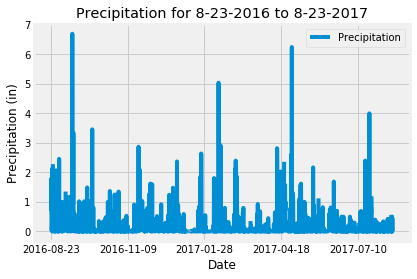

In [60]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_12_months = session.query(mts.date,mts.prcp).order_by(mts.date.desc()).filter(mts.date >= '2016-08-23')

# Perform a query to retrieve the data and precipitation scores
dates = []
rain = []
for datapoint in last_12_months:
    dates.append(datapoint[0])
    rain.append(datapoint[1])
rain_r = reversed(rain)
dates_r = reversed(dates)
# Save the query results as a Pandas DataFrame and set the index to the date column

rain_date_df = pd.DataFrame({'Precipitation': rain_r}, index = dates_r)
rain_date_df.dropna(how= 'any')
rain_date_df.plot()
plt.xlabel('Date')
plt.ylabel('Precipitation (in)')
plt.title('Precipitation for 8-23-2016 to 8-23-2017')

In [40]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain_date_df['Precipitation'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset
num_stations = session.query(mts.station).group_by(mts.station).count()
num_stations

In [89]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
sts_counts = session.query(mts.station,func.count(mts.station)).group_by(mts.station).order_by(func.count(mts.station).desc())
active_station = sts_counts.first()[0]
active_station

'USC00519281'

In [103]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_st_min = session.query(func.min(mts.tobs).filter(mts.station == active_station))[0][0]
active_st_max = session.query(func.max(mts.tobs).filter(mts.station == active_station))[0][0]
active_st_avg = session.query(func.avg(mts.tobs).filter(mts.station == active_station))[0][0]
print(f'Minimum Temperature for station {active_station} is {active_st_min}.')
print(f'Maximum Temperature for station {active_station} is {active_st_max}.')
print(f'Averge Temperature  for station {active_station} is {round(active_st_avg,2)}.')
  

Minimum Temperature for station USC00519281 is 54.0.
Maximum Temperature for station USC00519281 is 85.0.
Averge Temperature  for station USC00519281 is 71.66.


Text(0.5, 1.0, 'Temperature Trends for Station USC00519281')

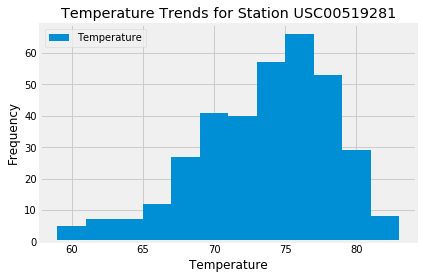

In [110]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_data = session.query(mts.station,mts.date,mts.tobs).filter(mts.station == active_station)
active_station_last_12 = active_station_data.order_by(mts.date.desc()).filter(mts.date >= '2016-08-23')

active_station_tobs = []
for datapoint in active_station_last_12:
    active_station_tobs.append(datapoint[2])

active_station_tobs_df = pd.DataFrame({'Temperature':active_station_tobs})
active_station_tobs_df.plot(kind = 'hist', bins = 12)
plt.xlabel('Temperature')
plt.title(f'Temperature Trends for Station {active_station}')
    

# Close session

In [111]:
# Close Session
session.close()